<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Project 4: Applying Unsupervised Learning Algorithms
_Team Members: Mohammad Al Ali - Noha Zaman - Mariah Alshiekh_

---


### Contents:
- [Problem Statment](#Problem-Statment)
- [Executive Summary](#Executive-Summary)
- [Load Required Packages](#Load-Required-Packages)
- [Data Import and Description](#1.-Data-Import-and-Description)
- [EDA](#2.-EDA)
- [Data Visualization](#3.-Data-Visualization)
- [Modelling](#4.-Modelling)
- [Conclusion](#5.-Conclusion)

### Problem Statment

<p style="text-align:justify">In recent times, interest in video games has been increased. A video game is an electronic game that involves interaction with a user interface or input device – for example a joystick, controller, keyboard, or motion sensing device – to generate visual feedback for a player. The most famous device of video games is PlayStation 4 . More than one million players are active on PlayStation 4. Players of PlayStation 4 games are of different ages, different cultures and interests as well as developers from different countries. Therefore, suggesting a specific game to any player is very hard. Thus, our main aim in this project is to create a recommendation system that provides each player on PlayStation Network a suitable game based on the features of games.</p>

---

### Executive Summary

This project focuses on building recommender model on video games of PlayStation 4. The recommendation depends on Content Based method with different algorithms:
<ol>
<li> Nearst neighbors algorithm : select the nearst game that contain similar features to user selection.</li>
<li> Random forest algorithm : calculate the recommend score based on features importance to rate.</li>
</ol>
Currently, the development video games accelerate sharply. As a result, the number of players have been increased.
Therefore, it became more difficult to suggest games to a specific player. The objective of our project is solving this issue by using machin learning algorithems.
The project conducts on the data science process (`Recommender system`).
<br>
<br>
Exploratory data analysis produces the findings:

- The quarter of games required one hour for completion the game.
- The Drowning (HK/TW) game is the highest rated games.
- The DRIVECLUB game has the highest score.
- The players prefer to games that have high challenge.

Based on findings, our recommender system focused on these features (`rate` , `score` , `comp_perc` ,`gamers`).
These features make recommender system more reliable.

---

### Load Required Packages

In [3]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=22b42636f856e923bb32cf5030e15087e91a2aa497df750b6e66782acfd3bcf1
  Stored in directory: /Users/newuser/Library/Caches/pip/wheels/8a/42/e5/d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp
Note: you may need to restart the kernel to use updated packages.


In [16]:
#import the libraries that used in the project
#main libraries
import pandas as pd
import numpy as np

#libraries for modeling
from rfpimp import permutation_importances #pip install rfpimp
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

#libraries for time
from datetime import datetime
from datetime import timedelta

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

---
### 1. Data Import and Description

- We deal with [RS-PS4 Games](https://www.kaggle.com/ww1234/ps4-games) dataset.

In [5]:
#load dataset which is RS-PS4_Game
game_data = pd.read_csv('./games_data.csv')

In [6]:
game_data.head()# show the head of dataset

,Unnamed: 0,game,score,leaderbord,gamers,comp_perc,rating,url,min_comp_time,max_comp_time
0,0,A Boy and His Blob,638,2.02,2194,16.5,3.2,https://www.truetrophies.com/game/A-Boy-and-Hi...,15,20
1,1,A Hat in Time,1992,1.53,7062,35.9,4.2,https://www.truetrophies.com/game/A-Hat-in-Tim...,15,20
2,2,A Hero and a Garden,1364,1.01,503,97.6,5.0,https://www.truetrophies.com/game/A-Hero-and-a...,0,1
3,3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,https://www.truetrophies.com/game/A-Hero-and-a...,0,1
4,4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,https://www.truetrophies.com/game/A-Kings-Tale...,4,5


##### Description dataset

|Feature|Description|
|---|---|
|game|Contains the games name|
|score|Contains maximum TrueTraphy score|
|leaderbord|Contains Game Leaderboard ratio|
|gamers|Contains the number of gamers plying this game in truetrophies website|
|comp_perc|Contains percentage of how many gamer complete this game|
|rating|Contains a rating from people who play this game by out of 5|
|url|Contains URL that have more information about each game|
|min_comp_time|Contains minimnum estimated time per hour to unlock all trophies|
|max_comp_time|Contains maximum estimated time per hour to unlock all trophies|


---
### 2. EDA

In [7]:
#Determine how many observations are missing
game_data.isnull().sum()

Unnamed: 0       0
game             0
score            0
leaderbord       0
gamers           0
comp_perc        0
rating           0
url              0
min_comp_time    0
max_comp_time    0
dtype: int64

In [8]:
#check datatype for each features  
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1584 non-null   int64  
 1   game           1584 non-null   object 
 2   score          1584 non-null   int64  
 3   leaderbord     1584 non-null   float64
 4   gamers         1584 non-null   int64  
 5   comp_perc      1584 non-null   float64
 6   rating         1584 non-null   float64
 7   url            1584 non-null   object 
 8   min_comp_time  1584 non-null   int64  
 9   max_comp_time  1584 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 123.9+ KB


In [9]:
#Drop unnessary coulmns
game_data.drop(['Unnamed: 0'],axis=1, inplace=True)

##### Describe the summary statistics for the columns

In [10]:
game_data.describe()# now need to see the detial of the data by using describe

,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1894.984217,1.583971,18589.357323,49.020455,3.095455,16.231061,25.275884
std,1389.680978,0.748916,33676.397335,35.220544,0.973732,28.020810,70.424345
min,189.000000,1.000000,60.000000,0.000000,0.500000,0.000000,1.000000
25%,1313.000000,1.050000,1141.000000,14.200000,2.400000,0.000000,1.000000
50%,1458.500000,1.300000,3909.500000,45.600000,3.300000,5.000000,6.000000
75%,2419.250000,1.880000,18920.500000,86.525000,3.900000,20.000000,25.000000
max,12017.000000,7.380000,245220.000000,99.600000,5.000000,200.000000,700.000000


##### Variable Identification: Identify the type of every variable (continuous or categorical)

In [11]:
# We divied the features in the dataset to two types (continous and categorical) 
# this technieqe help us for visualization
continuous_var=list( game_data.loc[:,game_data.dtypes != 'object'].columns.values )
categorical_var=list( game_data.loc[:,game_data.dtypes == 'object'].columns.values )

# show the features in each types
print ('continuous variable: ',continuous_var)
print('categorical variable: ',categorical_var)

continuous variable:  ['score', 'leaderbord', 'gamers', 'comp_perc', 'rating', 'min_comp_time', 'max_comp_time']
categorical variable:  ['game', 'url']


---
### 3. Data Visualization

- 1- Plot all the variables on boxplots together

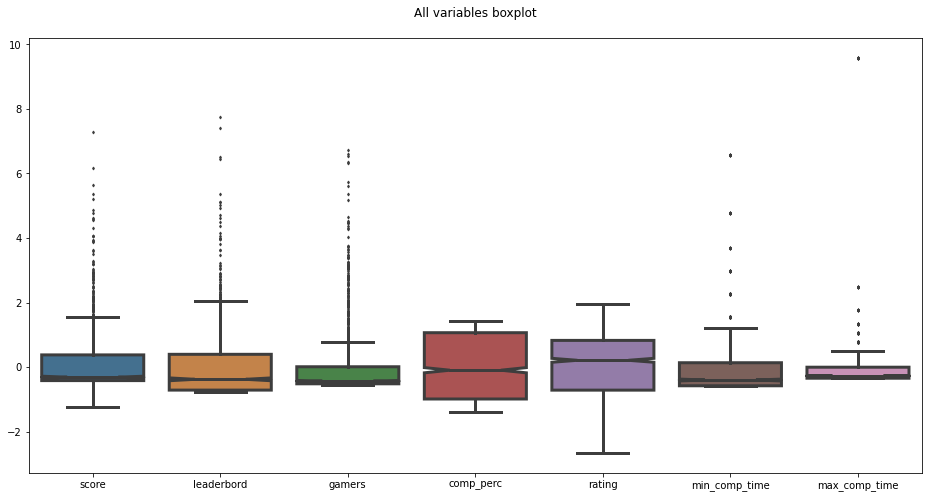

In [12]:
fig,ax = plt.subplots(figsize=(16,8))

# scale the data before visulization
ss = StandardScaler()
game_data_numeric = game_data.select_dtypes(include=np.number)
game_data_numeric = pd.DataFrame(ss.fit_transform(game_data_numeric),columns=game_data_numeric.columns)

# boxplot usually help us to discover the outlire in features
sns.boxplot(data=game_data_numeric, orient='v', fliersize=2, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

***we note the (score - leaderbord - gamers) have a highest numbers of outlier.***

<br>

- 2- Plot all the variables histogram

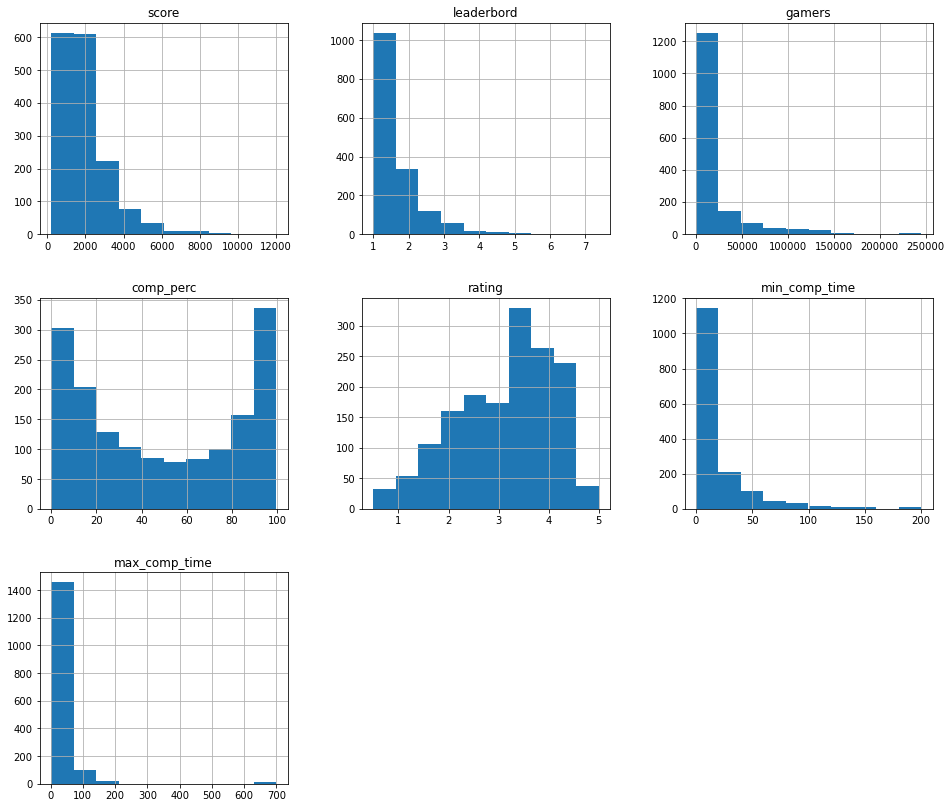

In [13]:
# compute histogram 
# do histogram for continouse features to see the distribution and then the skew
game_data.hist(column=continuous_var,figsize=(16,14));

***we note most of features have unnormal distribution with positive skews.*** 

<br>

- 3- Plot games rating Distribution

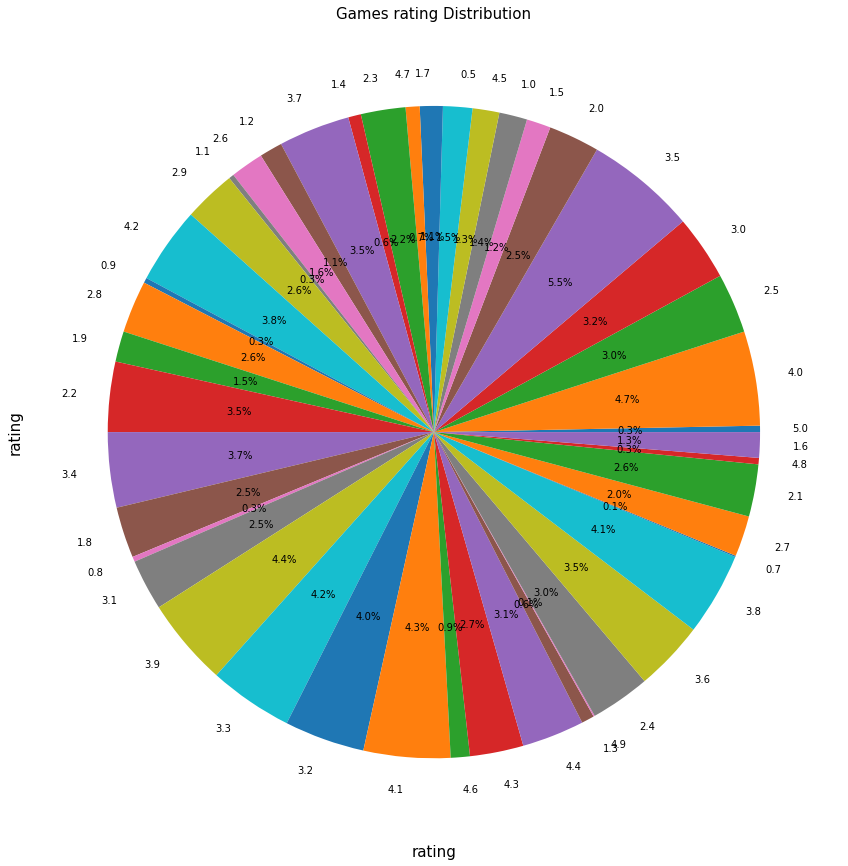

In [25]:
# do pie chart to show the rate for each game
fig,ax = plt.subplots(figsize=(15,15))
game_data['rating'].value_counts(sort=False).plot(kind='pie' , autopct='%0.1f%%',shadow=False)
plt.title('Games rating Distribution',fontsize=15)
plt.xlabel('rating',fontsize=15)
plt.ylabel('rating',fontsize=15);

***We note the most rate of games is 3.5***

<br>

<br>

- 4- plot max_comp_time Distribution 

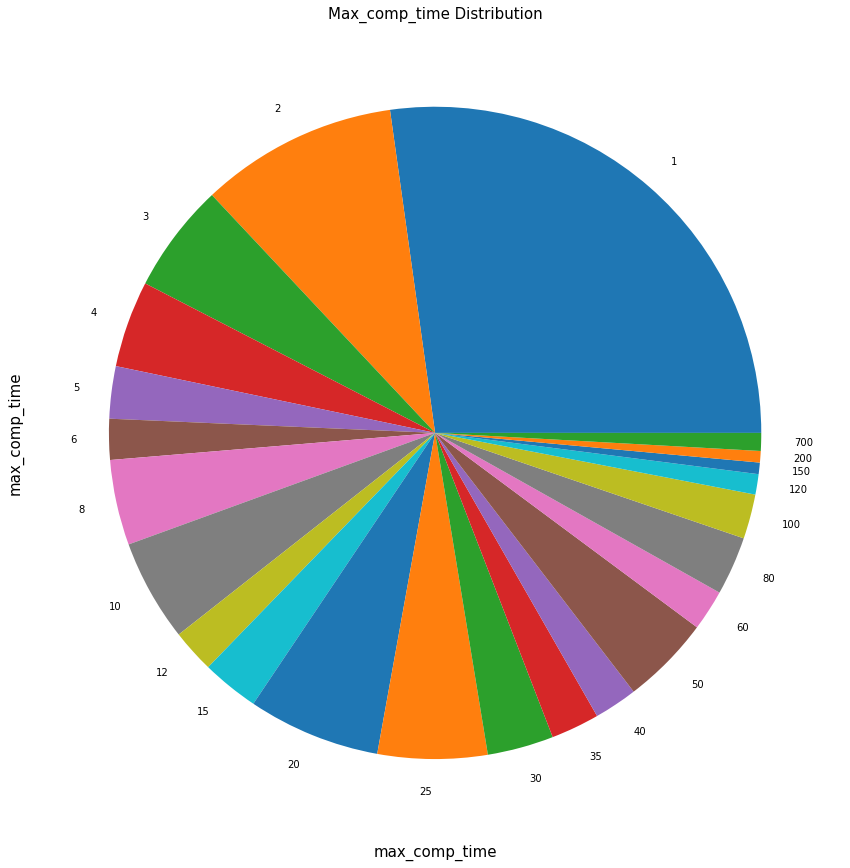

In [24]:
# do pie chart to show the distribution of max_comp_time
fig,ax = plt.subplots(figsize=(15,15))
game_data['max_comp_time'].value_counts(sort=False).plot(kind='pie')
plt.title('Max_comp_time Distribution',fontsize=15)
plt.xlabel('max_comp_time',fontsize=15)
plt.ylabel('max_comp_time',fontsize=15);

***We note from above chart the quarter of games required one hour for complation the game***

<br>

- 5- plot min_comp_time Distribution

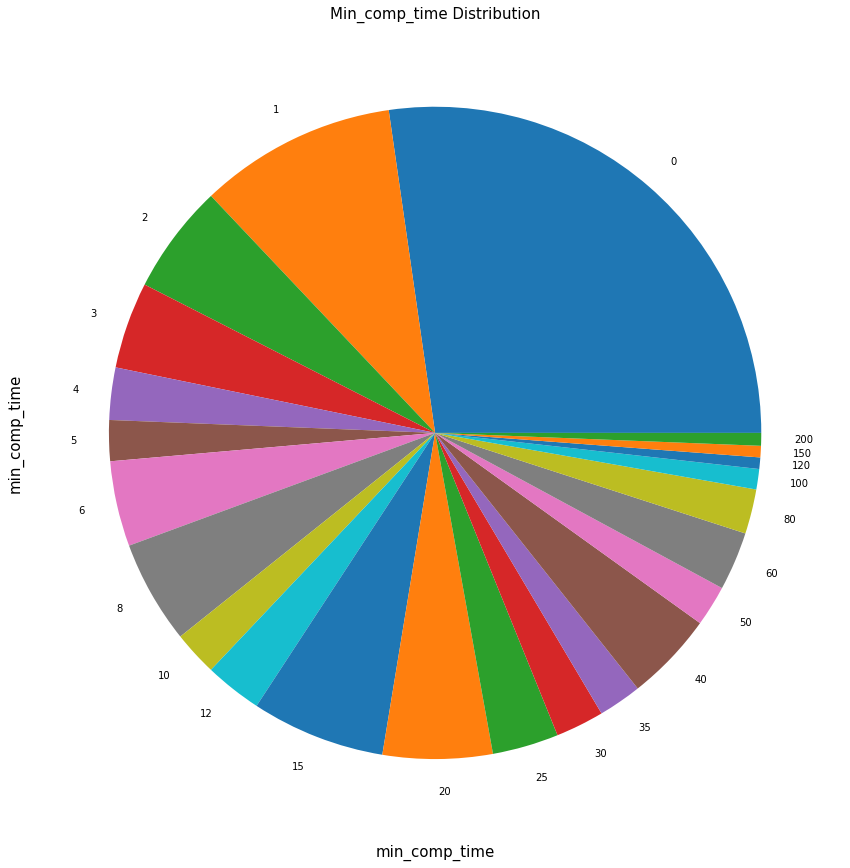

In [26]:
# do pie chart to show the distribution of min_comp_time
fig,ax = plt.subplots(figsize=(15,15))
game_data['min_comp_time'].value_counts(sort=False).plot(kind='pie')
plt.title('Min_comp_time Distribution',fontsize=15)
plt.xlabel('min_comp_time',fontsize=15)
plt.ylabel('min_comp_time',fontsize=15);

***We note from above chart the quarter of games required less than one hour for complation the game***

<br>

- 6- plot pairplot 

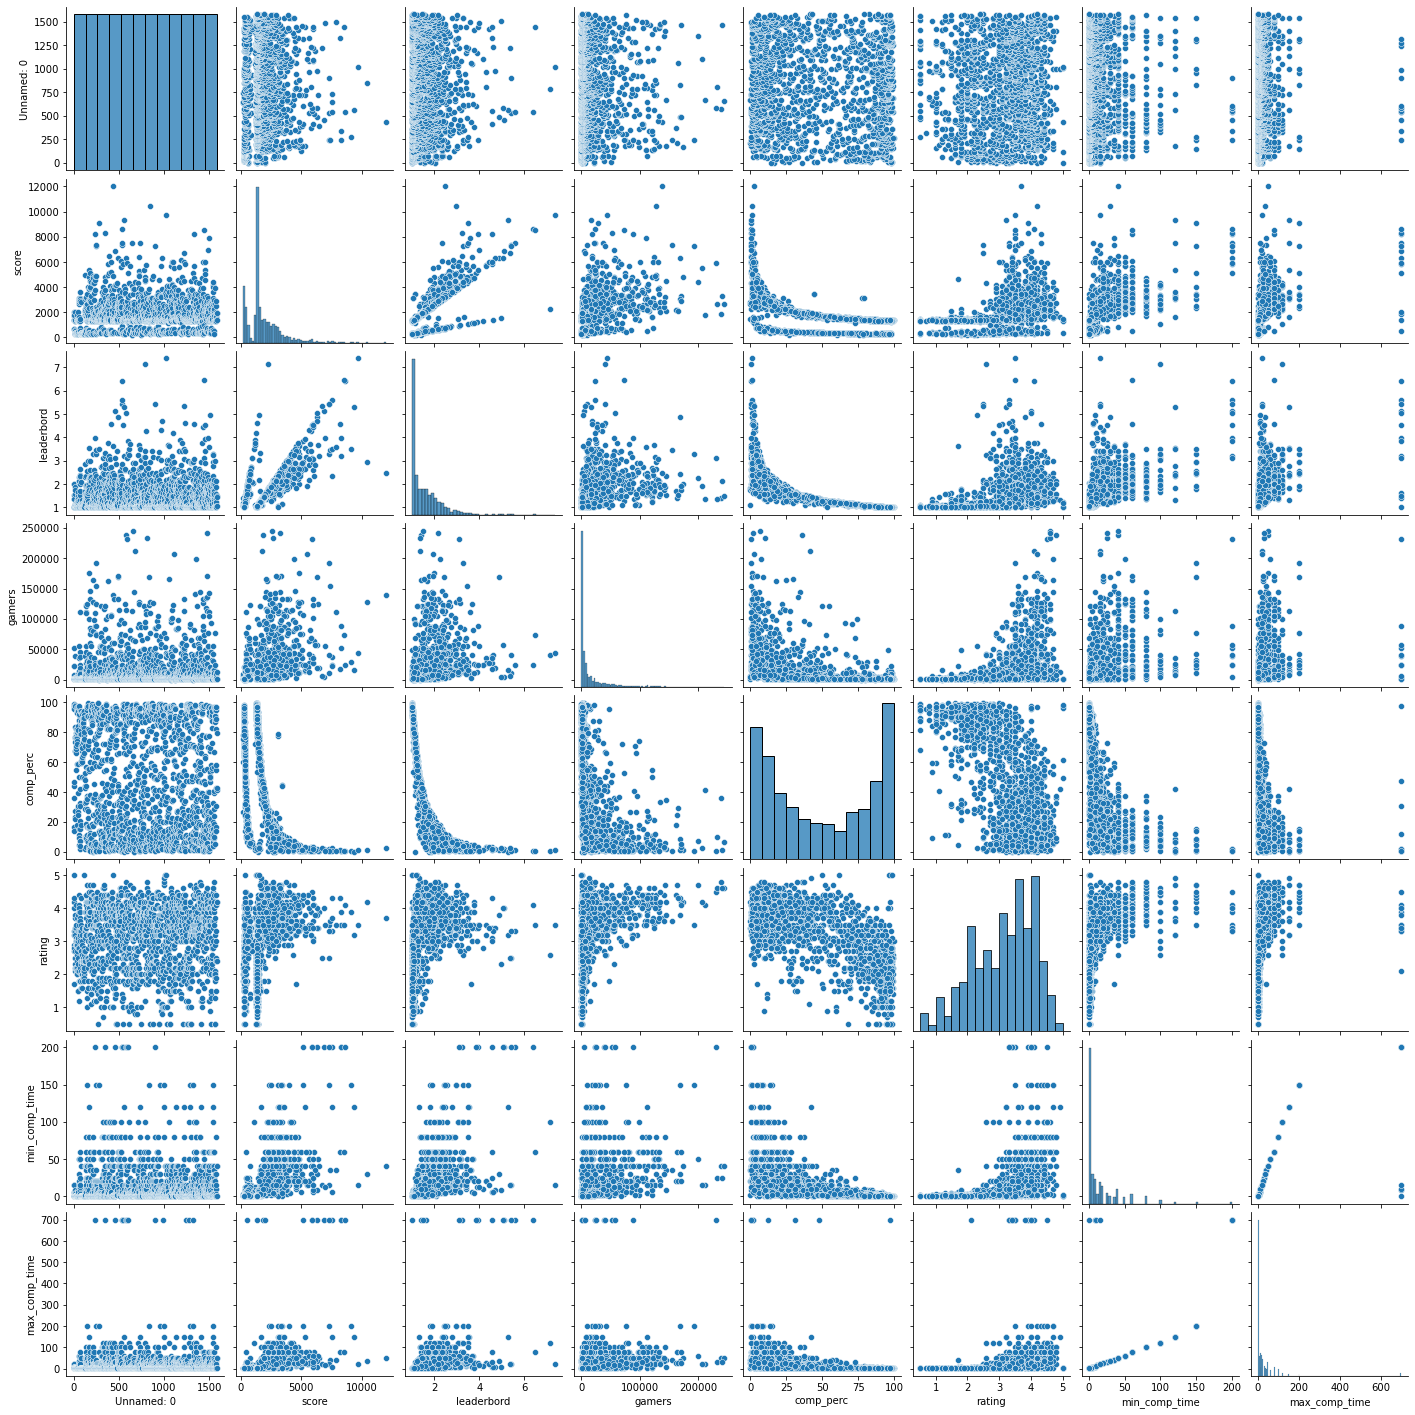

In [14]:
sns.pairplot(game_data);# do pair plot in the whole dataset

***The pair plot show the realtion between features and its distributions***

- 7- plot heatmap corrolation between continuous features 

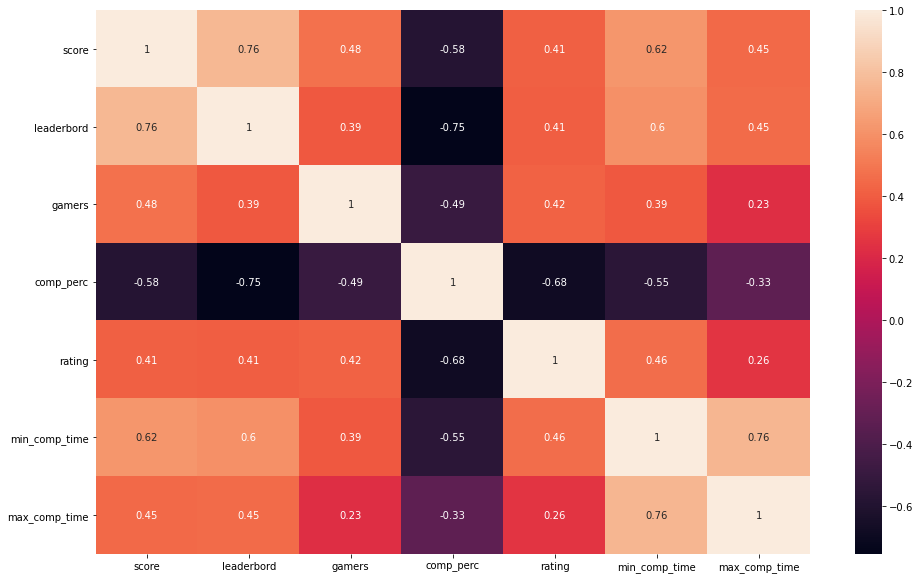

In [25]:
# do the heatmap to show the correlation between features
plt.figure(figsize=(16,10))
sns.heatmap(game_data.corr(), annot=True)
plt.show()

***We note the comp_perc have neagative corrolation with other features.***

- 8- plot the top 10 rated games

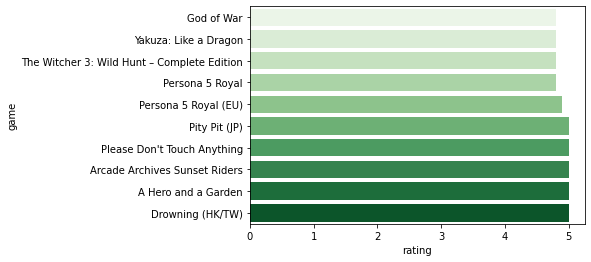

In [14]:
# do the barplot to show the top 10 rated games
game_per_rating = game_data[['game','rating']]
game_per_rating=game_per_rating.sort_values(by='rating', ascending=True, inplace=False)
top_10_game_rating = game_per_rating.tail(10)
sns.barplot(x='rating',y='game',data=top_10_game_rating,palette='Greens');

***The Drowning (HK/TW) game is the highest rated games.*** 

- 9- plot the top 10 score games

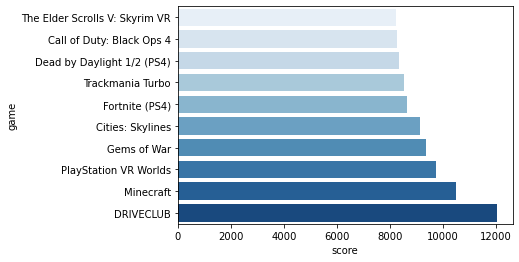

In [15]:
# do the barplot to show the top 10 score games
game_per_rating = game_data[['game','score']]
game_per_rating=game_per_rating.sort_values(by='score', ascending=True, inplace=False)
top_10_game_rating = game_per_rating.tail(10)
sns.barplot(x='score',y='game',data=top_10_game_rating,palette='Blues');

***The DRIVECLUB game has the highest score.*** 

---
### 4. Modelling

## 4.1 Content Based Recommender - Nearest Neighbors Algorithm

In [21]:
# we can create a test data point to represent our player description
# The player description is: the features values randomly selected in common range between gamers. 
# (score-(1500,3500), gamers-(10000,30000), comp_perc-(60.0,80.0), rating-(4.0,5.0), max_comp_time-(25,35) Hours)

test_point = [random.randrange(1500,3500), random.randrange(10000,30000), random.randrange(60.0,80.0),random.randrange(4.0,5.0),random.randrange(25,35)]
X = game_data.iloc[:, [1, 3, 4, 5,8]].values

# check the first 5 games
X[0:5]

array([[6.3800e+02, 2.1940e+03, 1.6500e+01, 3.2000e+00, 2.0000e+01],
       [1.9920e+03, 7.0620e+03, 3.5900e+01, 4.2000e+00, 2.0000e+01],
       [1.3640e+03, 5.0300e+02, 9.7600e+01, 5.0000e+00, 1.0000e+00],
       [1.3630e+03, 5.8100e+02, 9.7800e+01, 2.9000e+00, 1.0000e+00],
       [6.3700e+02, 2.1914e+04, 1.4100e+01, 3.3000e+00, 5.0000e+00]])

In [22]:
# do fit in NearestNeighbors model for the selection columns
nn = NearestNeighbors(n_neighbors=1).fit(X)

# kneighbors returns the nearest neighbor for the test_point
nearest_array=nn.kneighbors([test_point]) # print the array that contains the nearest

x = re.findall("\d", str(nearest_array[1]))# extract the number from array 
s = [str(i) for i in x] # convert x to string 
res = int("".join(s))# join string then converted to integer 
res # print the index of the row that contains the nearest

573

In [23]:
game_data.iloc[res] #show the features of the row

game                                       God Eater: Resurrection
score                                                         3532
leaderbord                                                    2.65
gamers                                                       15370
comp_perc                                                      9.1
rating                                                         3.7
url              https://www.truetrophies.com/game/God-Eater-Re...
min_comp_time                                                   80
max_comp_time                                                  100
Name: 573, dtype: object

## 4.2 Content Based Recommender - Feature Importances (Random Forest)

In [25]:
# we define 3 functions, each of them do random forest but in different strategies
#1- first one : by using only impotance features 'rf.feature_importances_'
def imp_df(column_names, importances):# send the name of columns and feature_importances_
    data = {
        'Feature': column_names,# save the name of columns
        'Importance': importances,# save the impotances
    }
    
    # create new dataframe that contains two columns ['Feature','Importance']
    # assign 'Feature' as an index
    df = pd.DataFrame(data)\
        .set_index('Feature')\
        .sort_values('Importance', ascending=False)# sort 'Importance' for high prority to low

    return df # return the dataframe

#2- Second : by using random forest for all features 
def r2(rf, X_train, y_train): # send the model, X_train and target
    return r2_score(y_train, rf.predict(X_train))# return the predict score for each feature

#3- Third: using random forest for all features by using for loop each time drop one feature
# To see the effective of this feature to the target by the score
def drop_col_feat_imp(model, X_train, y_train, random_state=42): # send model, X_train, y_train
    model_clone = clone(model)# Assign colne for model clone
    model_clone.random_state = random_state

    model_clone.fit(X_train, y_train)# do fit
    benchmark_score = model_clone.score(X_train, y_train)# calculate the score after fitting 

    importances = []# define empty list
    
    for col in X_train.columns:# for loop for all columns
        model_clone = clone(model)# do clone for model
        model_clone.random_state = random_state#do random state
        model_clone.fit(X_train.drop(col, axis=1), y_train)# do fit for x_train after drop column
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)# calculate the score
        importances.append(benchmark_score - drop_col_score)# calucalte the difference
    return imp_df(X_train.columns, importances)# return the column name and its importance 


X = game_data.drop(['rating', 'game', 'url'], axis=1)# drop useless columns and assign the rest as X_train
y = game_data['rating']# assign the target which is 'rating'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)# do split

rf = RandomForestRegressor(n_estimators=10, random_state=0).fit(X_train, y_train)# random forest for X_train and y_train
print('Random Forest Feature Importances:')
print(imp_df(X.columns, rf.feature_importances_))# call the first function and print the result
print()

print('Permutation Feature Importance:')
print(permutation_importances(rf, X_train, y_train, r2))# call the second function and print the result
print()

print('Drop-Col Feature Importance:')
print(drop_col_feat_imp(rf, X_train, y_train))# call the third function and print the result

Random Forest Feature Importances:
               Importance
Feature                  
min_comp_time    0.444413
comp_perc        0.210325
gamers           0.170776
score            0.087064
leaderbord       0.066156
max_comp_time    0.021266

Permutation Feature Importance:
               Importance
Feature                  
min_comp_time    0.515881
gamers           0.352092
comp_perc        0.257561
leaderbord       0.142663
score            0.137022
max_comp_time    0.043456

Drop-Col Feature Importance:
               Importance
Feature                  
gamers           0.014165
leaderbord       0.005451
score            0.004672
min_comp_time    0.001782
max_comp_time    0.001166
comp_perc        0.000102


We have chosen the `Drop-Col Feature` because its order of feature is more realistic.

In [25]:
# After we choice the third method and now we calculate the Score_Of_Recommend' for each movie
 # malutiply the Importance score with the column's value then, sum all result 
    # put the 'Score_Of_Recommend' in new column in the dataset 

game_data['Score_Of_Recommend'] = (
    0.014165 * game_data['gamers'] + 
    0.005451 * game_data['leaderbord'] + 
    0.004672 * game_data['score'] + 
    0.001782 * game_data['min_comp_time']+
    0.001166 * game_data['max_comp_time']+
    0.000102 * game_data['comp_perc']
)

In [26]:
# sort the dataset depend on the 'Score_Of_Recommend' from the highest to lowest and show the result
game_data.sort_values(by='Score_Of_Recommend',ascending=False).head()

,game,score,leaderbord,gamers,comp_perc,rating,url,min_comp_time,max_comp_time,Score_Of_Recommend
657,Horizon Zero Dawn,2627,1.47,245220,6.3,4.6,https://www.truetrophies.com/game/Horizon-Zero...,40,50,3485.952880
1470,Uncharted 4: A Thief's End,3268,2.14,241211,1.5,4.6,https://www.truetrophies.com/game/Uncharted-4-...,25,30,3432.113259
574,God of War,1892,1.40,238630,36.1,4.8,https://www.truetrophies.com/game/God-of-War-P...,40,50,3389.174268
810,Marvel's Spider-Man,2656,1.34,232809,9.8,4.6,https://www.truetrophies.com/game/SpiderMan/tr...,25,30,3310.236151
585,Grand Theft Auto V,5913,3.10,231535,0.4,4.5,https://www.truetrophies.com/game/Grand-Theft-...,200,700,3308.508350


---
### 5. Conclusion

<p style="text-align:justify">In the video games, there are many factors contribute in recommendation like rating and number of gamers. The diversity of gamers appear in video games such as minimum time for completion. The DRIVECLUB has the highest score among video games. So, the recommender system will consider those factors to produce a reliable result. The recommendations are building the recommender system based on the content of games by Nearest Neighbors for a similar game and Feature Importances for the best game. Also, we should consider the impact of each factor and know the behavior of gamers is important while building a recommendation system.</p>